# [ICTCOG AI Academy] 7기 고급시각저녁반
# Tensorflow를 활용한 기계학습/딥러닝 (4)

### Sequential
- 단반향 구조 (3번째 유형)

 ### Model
- multi-inputs, multi-outputs 지원 (4번째 유형)
 - multi-ouputs 출력값이 다른 여러 레이어의 입력으로 들어 가는 경우

In [109]:
import tensorflow as tf

In [ ]:
tf.keras.models.Sequential #단반향, 사용하기 쉬움
tf.keras.models.Model      #multi-inputs, outputs

In [7]:
issubclass(tf.keras.models.Sequential, tf.keras.models.Model) #Model로부터 상속 받아 단순화함

True

In [2]:
tf.keras.models.Model

tensorflow.python.keras.engine.training.Model

In [4]:
model = tf.keras.applications.ResNet50() # 이미 학습한 데이터 가져옴.

In [6]:
model.summary() #복잡한 구조가 있는 경우 Connected to     

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

- 기계학습 목적 : 데이터로부터 specific 한 문제 해결을 위한 최적의 모델들 만들어 선택
- ANN(MLP) 기반
  - 학습 테크닉
  - 모델 구조 ( hyper-parameter)
    - 구조를 어떻게 만드는가 ?
    - 복잡한 구조를 어떻게 학습시킬까?
      - undefitting 가능성


1. 모델 정의/선언
  - Sequential
  - Model
2. 학습 전략
3. 학습

In [138]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()  

In [18]:
tf.keras.layers.Input  #이론: input layer는 레이어로 간주하지 않음
tf.keras.Input         #alias

<function tensorflow.python.keras.engine.input_layer.Input>

In [ ]:
#함수형 패러다임 방법 2가지
layer1(inputs)  
tf.keras.layers.Dense(128)(inputs)

In [14]:
#1.
inputs=tf.keras.Input( shape=(28*28,))#데이터를 직접 변경 
layer1= tf.keras.layers.Dense(128)
layer2= tf.keras.layers.Dense(128)
output = tf.keras.layers.Dense(10)

In [17]:
outputs = output( layer2(   layer1(inputs)  )   )

In [ ]:
#2. 
inputs=tf.keras.Input( shape=(28*28,))
x=tf.keras.layers.Dense(128)(inputs)
x=tf.keras.layers.Dense(128)(x)
outputs=tf.keras.layers.Dense(10)(x)

In [19]:
model = tf.keras.models.Model( inputs=inputs, outputs=outputs ) #arg : inputs, outputs, name

In [22]:
model.summary() #InputLayer 표시됨, Output shape의 input에 [] 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [23]:
#위의 모델을 Sequential 구현
model_s= tf.keras.models.Sequential([
                                     tf.keras.layers.Input(shape=(28*28,)),
                                     tf.keras.layers.Dense(128),
                                     tf.keras.layers.Dense(128),
                                     tf.keras.layers.Dense(10)                                     
])

In [24]:
model_s.summary() #input layer 표시 안 됨

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
# multi-inputs 예시
inputs1=tf.keras.Input( shape=(28*28,))
inputs2=tf.keras.Input( shape=(28*28,))
x=tf.keras.layers.Concatenate()([inputs1,inputs2])
x=tf.keras.layers.Dense(128)(inputs)
y=tf.keras.layers.Dense(128)(inputs)
z=tf.keras.layers.Concatenate()([x,y])

x=tf.keras.layers.Dense(128)(z)
outputs=tf.keras.layers.Dense(10)(x)

model = tf.keras.models.Model( inputs=inputs, outputs=outputs ) 
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 128)          100480      input_3[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 128)          100480      input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 256)          0           dense_20[0][0]                   
                                                                 dense_21[0][0]             

Anaconda prompt( 관리자 권한) 통해 설치
> - conda install graphviz
> - conda install pydotplus

console
> - !pip install pydot 
> - !pip install graphviz


- 설치 후 커널/ 아나콘다 재시작 필요
- TensorFlow 2.x 버전 이상



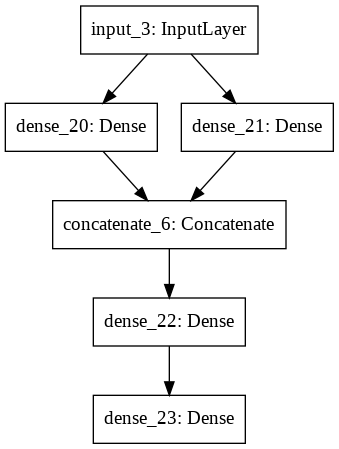

In [31]:
tf.keras.utils.plot_model(model) #시각화하여 이해가 쉬움

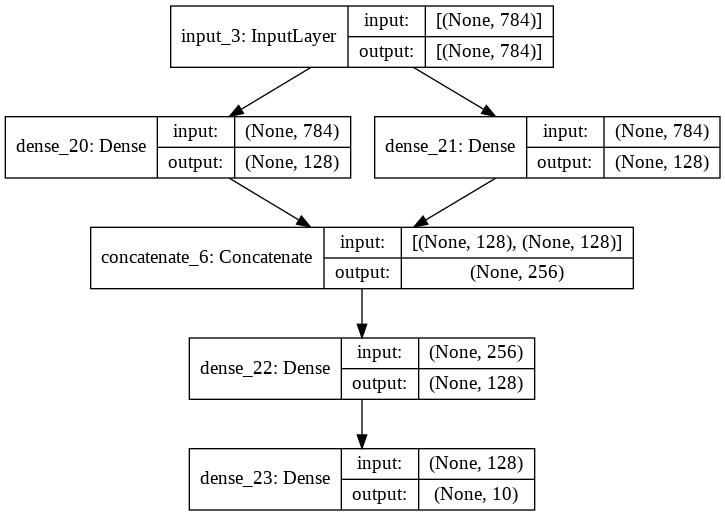

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True) #input, output shape 표시

### Funtional API
- 코드 길이 단축
- 한번 선언되면 재활용에 좋으나 동적 아키텍쳐 지원하지 않음
  - 상속 통해서 동적인 모델 생성 가능
    -  제어 가능
- 디버깅 용이
- 직렬화, 복제
  - 재사용

- 믹스 앤 매치 API 혼합
  - Functional + Subclassing
    - 추후에 다룰 예정
- [ Functional API 참고](https://www.tensorflow.org/guide/keras/functional)

> 함수형 패러다임
  - 형식적 증명 가능성
    - immutable
  - 디버깅 , 테스트 용이성
  - 결합성


> 책: Machine Learning Yearning 
  - Plateau 플라토 현상: 전통적인 머신러닝은 데이터 양이 어느정도 수렴하면 더이상 성능이 올라가지 않는 정체구간
  - 딥러닝은 더 **복잡한 알고리즘이며 데이터가 많을수록 레이어가 깊어질 수록  성능이 계속 올라감**
      - 학습파라미터가 훨씬 많음







In [139]:
(train_images, train_labels), (test_images, test_labels) =  tf.keras.datasets.fashion_mnist.load_data()

In [36]:
X_train.shape #28x28 크기의 60000장 -> 데이터가 작은편-> 간단한 모델

(60000, 28, 28)

In [37]:
 import matplotlib.pyplot as plt

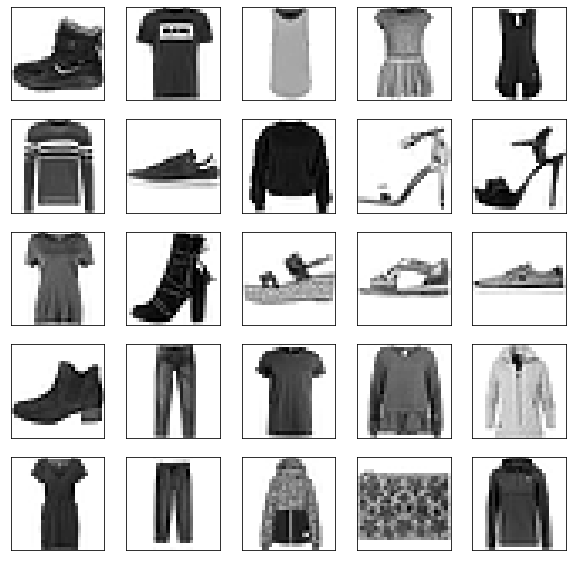

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

#### 모델 구성
- 10 classification
- 2-layers
  - 비선형 activation function
- output 10개, softmax
- one-hot enocoding 은 optional
- activation function


- 학습을 통해서 각 클래스의 feature를 찾아줌
  - feature extractor 역할을 함
  - convolution으로 이미지 관련 성능 극대화됨
> playgrounds
- Hebb Rule : 학습을 통해서 연결 강한 정도= 가중치


- 기준 모델 만들기
- unit 크기 조절 (2의 배수인 이유는 GPU 할당 때문- vectorization )

In [68]:
#함수형 패러다임 
inputs= tf.keras.Input(shape=(28,28))           # 2차원 데이터 입력받음
flatten=tf.keras.layers.Flatten()               # 1차원화
dense1= tf.keras.layers.Dense(16,activation='relu',name='Layer1')
dense2= tf.keras.layers.Dense(16,activation='relu',name='Layer2')
output= tf.keras.layers.Dense(10,activation='softmax') #10개 분류

In [119]:
# output(dense2(dense1(flatten(inputs))))
x= flatten(inputs)
x= dense1(x)
x= dense2(x)
outputs= output(x)
model=tf.keras.models.Model(inputs=inputs,outputs=outputs)

In [99]:
model.summary() #학습 파라미터 13,002개 , Input,Flatten은 학습 X 

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 16)                12560     
_________________________________________________________________
Layer2 (Dense)               (None, 16)                272       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [100]:
#1차원화
inputs2= tf.keras.Input(shape=(28*28,))           
x= dense1(inputs2)
x= dense2(x)
outputs= output(x)
model2=tf.keras.models.Model(inputs=inputs2,outputs=outputs ,name='simple model2')

In [101]:
model2.summary()

Model: "simple model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
Layer1 (Dense)               (None, 16)                12560     
_________________________________________________________________
Layer2 (Dense)               (None, 16)                272       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


- 다양한 메트릭을 통해서 평가함

In [120]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [110]:
train_labels.shape

(60000,)

### 학습
- 텐서플로우에서는 이미 학습한 결과가 누적됨
- Variable Tensor

In [104]:
model.fit(train_images, train_labels ,epochs=5) # loss가 줄어들고 acc증가 -> 학습 잘 되는중

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 4.4307 - acc: 0.3782
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0325 - acc: 0.5939
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8085 - acc: 0.6922
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7349 - acc: 0.7090
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7118 - acc: 0.7144


In [106]:
model.fit(train_images, train_labels ,epochs=5,batch_size=10000)  # 6만/1만 = 6번

Epoch 1/5
6/6 [==============================] - 0s 48ms/step - loss: 0.6050 - acc: 0.7416
Epoch 2/5
6/6 [==============================] - 0s 51ms/step - loss: 0.6016 - acc: 0.7412
Epoch 3/5
6/6 [==============================] - 0s 52ms/step - loss: 0.5989 - acc: 0.7416
Epoch 4/5
6/6 [==============================] - 0s 49ms/step - loss: 0.5975 - acc: 0.7421
Epoch 5/5
6/6 [==============================] - 0s 51ms/step - loss: 0.5962 - acc: 0.7420


- Mutable 결과 3가지
  - 자기자신 변화 없으나 리턴 없음
  - 자기자신 변화 있으나 리턴 없음
  - 자기자신 변화 있으나 리턴 있음 -> fit

  - out 있으면 할당 가능

In [121]:
out = model.fit(train_images, train_labels ,epochs=40,batch_size=1000) # 6만/1천 = 60번
out

Epoch 1/40
60/60 [==============================] - 1s 7ms/step - loss: 0.4913 - acc: 0.8136
Epoch 2/40
60/60 [==============================] - 0s 8ms/step - loss: 0.4780 - acc: 0.8159
Epoch 3/40
60/60 [==============================] - 0s 8ms/step - loss: 0.4810 - acc: 0.8161
Epoch 4/40
60/60 [==============================] - 0s 7ms/step - loss: 0.4760 - acc: 0.8179
Epoch 5/40
60/60 [==============================] - 0s 7ms/step - loss: 0.4748 - acc: 0.8164
Epoch 6/40
60/60 [==============================] - 0s 7ms/step - loss: 0.4761 - acc: 0.8134
Epoch 7/40
60/60 [==============================] - 0s 7ms/step - loss: 0.4695 - acc: 0.8171
Epoch 8/40
60/60 [==============================] - 0s 7ms/step - loss: 0.4764 - acc: 0.8164
Epoch 9/40
60/60 [==============================] - 0s 8ms/step - loss: 0.4693 - acc: 0.8196
Epoch 10/40
60/60 [==============================] - 0s 7ms/step - loss: 0.4724 - acc: 0.8197
Epoch 11/40
60/60 [==============================] - 0s 7ms/step - lo

In [108]:
vars(model)

{'_activity_regularizer': None,
 '_auto_track_sub_layers': True,
 '_autocast': False,
 '_base_model_initialized': True,
 '_build_input_shape': TensorShape([None, 28, 28]),
 '_callable_losses': [],
 '_compiled_trainable_state': <WeakKeyDictionary at 0x7f950fc73128>,
 '_compute_dtype_object': tf.float32,
 '_compute_output_and_mask_jointly': True,
 '_default_training_arg': None,
 '_distribution_strategy': None,
 '_dtype_policy': <Policy "float32">,
 '_dynamic': False,
 '_enable_dict_to_input_mapping': True,
 '_expects_mask_arg': True,
 '_expects_training_arg': True,
 '_feed_input_names': ['input_20'],
 '_feed_input_shapes': [(None, 28, 28)],
 '_feed_inputs': [<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_20')>],
 '_inbound_nodes_value': [],
 '_initial_weights': None,
 '_input_coordinates': [(<tensorflow.python.keras.engine.input_layer.InputLayer at 0x7f9510354be0>,
   0,
   0)],
 '_input_layers': [<tensorflow.python.keras.engine.input_layer.InputLayer at 0x7f95

In [112]:
dir(out)  #  history 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [113]:
out.history  # 해당 out의 accuracy, loss 값 

{'acc': [0.7529500126838684,
  0.753333330154419,
  0.7532166838645935,
  0.7527833580970764,
  0.753933310508728],
 'loss': [0.5801346898078918,
  0.5785617828369141,
  0.577902615070343,
  0.576269805431366,
  0.5738446116447449]}

In [114]:
import pandas as pd

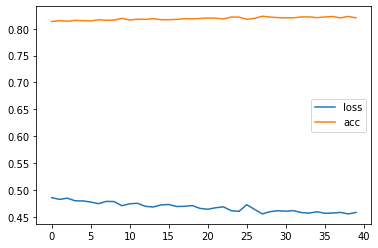

In [122]:
pd.DataFrame(out.history).plot()  #high variance -> overfitting


### 성능 향상
1. 데이터 관점
  - feature selection, **scaling**, dimnesionality reduction
    - z =x- m/sd  
    - **MinMax Scaler** : n =(X-min)/(Max-min)
      - 이미지 데이터의 특징: 0 ~ 255 사이의 값이기 때문에 0~1사이로 바꾸면 더 빠르게 수렴
        - sigmoid (0,1) 항상 양수, gradient vanishing
        - Tanh : (-1,1) (음수,양수) ,zero-centered
      - > NFL 
      
2. 모델 구조 관점
  - overfitting 줄이기 위해서 unit 갯수/layer 갯수 늘림




  


In [147]:
import mglearn

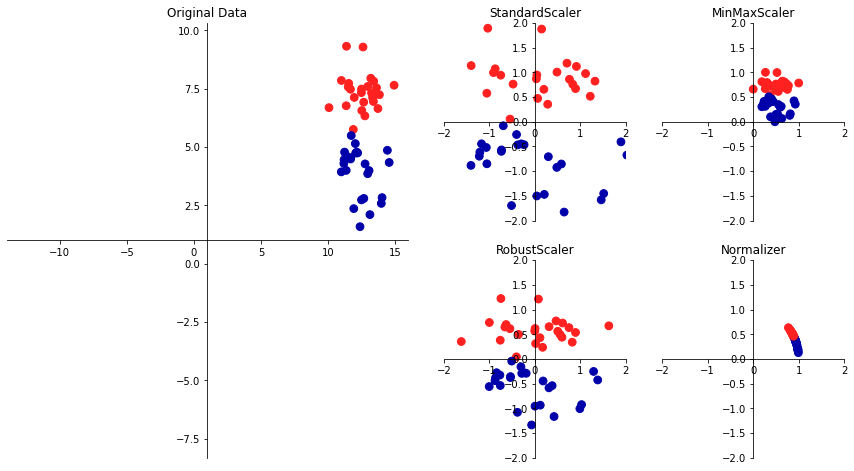

In [148]:
mglearn.plot_scaling.plot_scaling()  #

In [140]:
#normalization 
train_images_re = train_images/255   #(x-0)/(255-0)

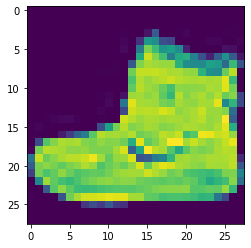

In [141]:
plt.imshow(train_images_re[0])  #이미지 변화 없음

In [142]:
inputs= tf.keras.Input(shape=(28,28))                 # 2차원 데이터 입력받음
flatten=tf.keras.layers.Flatten()                     # 1차원화
dense1= tf.keras.layers.Dense(16,activation='relu')
dense2= tf.keras.layers.Dense(16,activation='relu')
output= tf.keras.layers.Dense(10,activation='softmax') #10개 분류

In [143]:
x= flatten(inputs)
x= dense1(x)
x= dense2(x)
outputs= output(x)
model=tf.keras.models.Model(inputs=inputs,outputs=outputs)

데이터가 잘 못되는 경우 batch size가 작으면 엉터리로 학습 됨

In [144]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
out = model.fit(train_images_re, train_labels ,epochs=40,batch_size=100)  

Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.0970 - acc: 0.6246
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4868 - acc: 0.8314
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4404 - acc: 0.8481
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4163 - acc: 0.8569
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3907 - acc: 0.8627
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3893 - acc: 0.8630
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3774 - acc: 0.8678
Epoch 8/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3724 - acc: 0.8668
Epoch 9/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3545 - acc: 0.8723
Epoch 10/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3618 - acc: 0.8706
Epoch 11/40
600/600 [============================

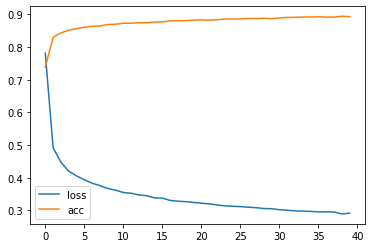

In [133]:
pd.DataFrame(out.history).plot() 

- 함수로 만들어서 간단하게 구조 변경 비교 가능
- 재사용

#### 모델을 함수로 Encapsulation 하는 경우
1. 관리 편이성
2. 재활용
  - Estimator 
  - wrapper 


- Estimator : 미리 만들어 진것을 가져다가 씀
  - 함수형 패러다임
  - Sicikit-learn과 사용하는 방법 비슷
  - train( input_fn = 함수형 )
- Scikit 연동






In [ ]:
tf.keras.wrapper.scikit_learn.KerasClassifier